# PTID-CDS-24-JUL-2007

# Handwritten Digits Recognition

## Introduction

Human handwriting is incredibly diverse, with some styles being easy to read while others can be challenging to interpret. This diversity reflects each person’s uniqueness and creativity. However, accurately recognizing handwritten digits is crucial for various applications, including postal services, banking, and automated data entry.

To address this, a reliable tool for recognizing handwritten digits is essential. Handwritten digit recognition enables machines to understand and classify human-written digits, a task complicated by the inherent imperfections and variability in handwriting.

In this project, we will develop and evaluate machine learning models using three different algorithms—SVM, KNN, and CNN—to determine which performs best for handwritten digit recognition.

## The Dataset

This project utilizes the MNIST dataset, a well-known collection of handwritten digits. This dataset is widely used for training and testing in the field of image classification.

It contains a collection of 28x28 pixel grayscale images of handwritten digits (0 through 9) along with their corresponding labels.

## Fetching the dataset

To begin, we need to import some libraries.

In [2]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

Next, we load the MNIST dataset and split it into training and testing sets. The MNIST dataset, when loaded using Keras, is already split into training and testing sets by default. 

Training Set: 60,000 images
Test Set: 10,000 images

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Analysing the data

First lets load the data and display the sample digits

## Sample visualization

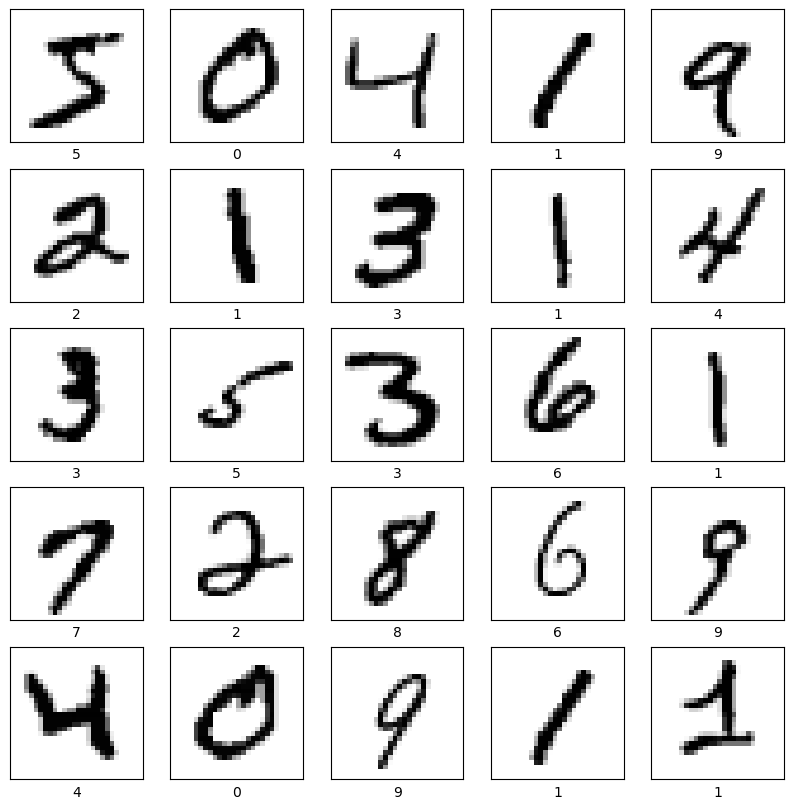

In [82]:
(X_train,y_train),(X_test, y_test)=keras.datasets.mnist.load_data()
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
    
plt.show()

## Examining Data Shapes

Then lets examine shapes of training and testing data

In [4]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


Lets check the Number of images present in Training and Testing Data

In [83]:
print(f"The images present in the Training Dataset are: {len(X_train)}, and the images present in the Testing Dataset are: {len(X_test)}")
print(f"The shape of  images are: {X_train[0].shape}")

The images present in the Training Dataset are: 60000, and the images present in the Testing Dataset are: 10000
The shape of  images are: (28, 28)


Visualising the first training image and printing correponding pixel values

## Visualizing a Single Image and Its Pixel Values

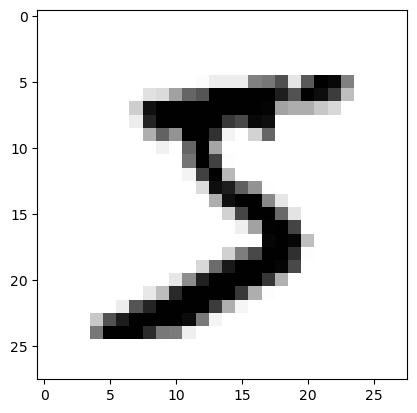

In [86]:
plt.imshow(X_train[0], cmap=plt.cm.binary)

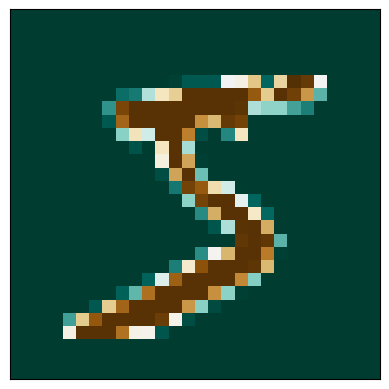

Pixel values
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 
  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255 247 127   0   0   0   0 
  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0 
  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82  82  56  39   0   0   0   0   0 
  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 182 247 241   0   0   0

In [84]:
plt.imshow(X_train[0], cmap='BrBG_r')
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.show()
print('Pixel values')
for row in X_train[0]:
    for pixel in row:
        print("{:3}".format(pixel), end=" ")
    print()

## Distribution of Digits in the Training Set

To gain furher insights into the dataset, we plot the distribution of the digits in the training set

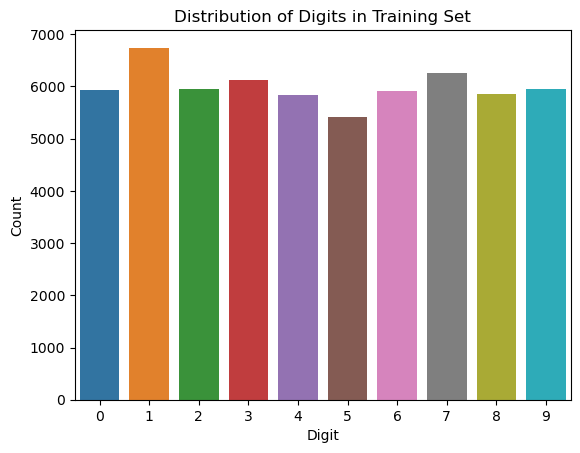

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x=y_train)
plt.title('Distribution of Digits in Training Set')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

The plot presents a bar chart illustrating the distribution of digits within the MNIST training set. Each bar represents a digit from 0 to 9, and the height of the bar corresponds to the frequency or count of that digit in the dataset. 

The bar heights are relatively similar, indicating that the digits are distributed fairly evenly within the training set. There are no significant imbalances or overrepresentations of any particular digit.

## Pixel Intensity Distribution

Additionally, we can visualize the distribution of pixel intensities across a sample of images to better understand the data

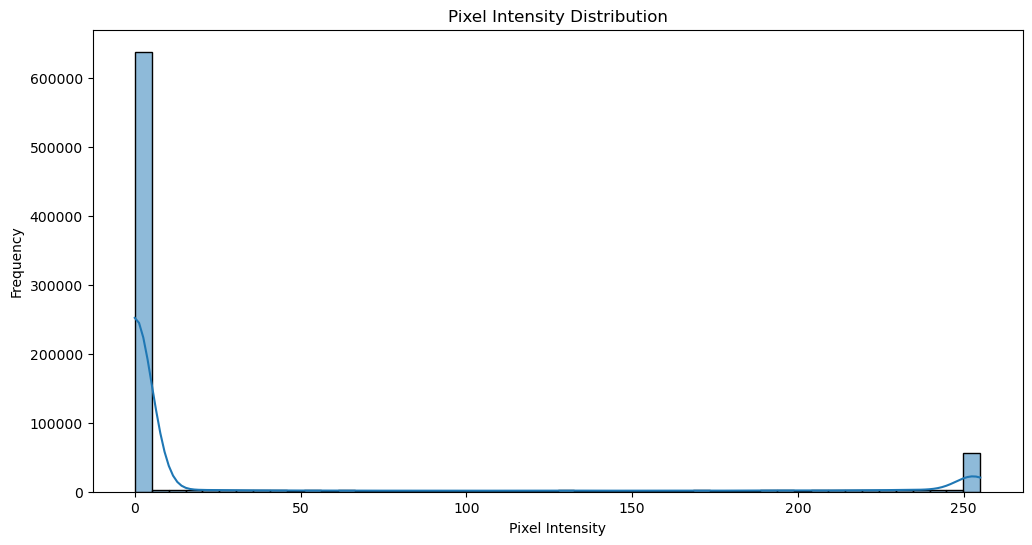

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_pixel_intensity_distribution(X, sample_size=1000):
    plt.figure(figsize=(12, 6))
    if sample_size < len(X):
        X = X[:sample_size]
    flattened_X = X.reshape(-1)
    sns.histplot(flattened_X, bins=50, kde=True)
    plt.title('Pixel Intensity Distribution')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.show()

plot_pixel_intensity_distribution(x_train, sample_size=1000)


The plot presents a histogram representing the pixel intensity distribution of the MNIST dataset. Pixel intensity values range from 0 (black) to 1 (white), with frequency (number of pixels) on the y-axis.

*Bimodal Distribution*: The histogram exhibits two distinct peaks. One centered around 0 (black) and another with a smaller peak around 1 (white). This suggests that a significant proportion of pixels in the MNIST images are either very dark or very light.

# Data preprocessing

## Reshaping and Normalizing the Data

For our model to work effectively, we need to preprocess the data. We start by reshaping each 28x28 image into a flat vector of 784 features. This transformation is necesary for algorithms like SVM, which expect input data in a 2D array where each row is a feature vector. Additionally, we normalize the pixel values by scaling them from the range [0, 255] to [0, 1]

In [7]:
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

x_train_flat = x_train_flat / 255.0
x_test_flat = x_test_flat / 255.0

## Print Pixel Values for verification

In [85]:
print("\nPixel values after normalization:")
for row in X_train[0]:
    for pixel in row:
        print("{:0.3f}".format(pixel), end=" ")
    print()
    
# Reshape the images to have a channel dimension
x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)


Pixel values after normalization:
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 
0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000 3.000 18.000 18.000 18.000 126.000 136.000 175.0

## Checking Shapes

Ensure that the shapes of x_train_flat and y_train match correctly

In [8]:
print(x_train_flat.shape)  
print(y_train.shape)       

(60000, 784)
(60000,)


## Checking Data Types

Next we have to ensure that x_train_flat and y_train are both numeric types, typically float64 for x_train_flat and int64 for y_train.

In [9]:
print(x_train_flat.dtype)  # Should be float64
print(y_train.dtype)       # Should be int64

float64
uint8


y_train is in uint8 format, while the SVM classifier typically expects labels to be in int64 format. To fix this, you can convert y_train (and y_test if necessary) to int64 using the .astype() method.

In [10]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')

## Checking for NaN or Infinite Values

Lets check for NaN or Infinite Values to ensure there are no NaN or infinite values in our data.

In [11]:
import numpy as np

print(np.isnan(x_train_flat).sum())  # Should be 0
print(np.isinf(x_train_flat).sum())  # Should be 0

0
0


Our data is now preprocessed and all set for training

# Support Vector Machine (SVM)

Support Vector Machine (SVM) is a supervised learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates data into different classes. The goal is to maximize the margin between the closest data points (support vectors) and the hyperplane. SVM is particularly good for linear and slightly non-linear data.

## Training the model

First, we’ll import SVC from scikit-learn svm module

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

Then we initialize an SVM model with a linear kernel and train the SVM model using the flattened training data (x_train_flat) and corresponding labels (y_train).

In [13]:
svm_model = SVC(kernel="linear", random_state=6)
svm_model.fit(x_train_flat, y_train)

SVC(kernel='linear', random_state=6)

## Making predictions on test set

We then use our trained SVM model to predict the label for making predictions on our test data 

In [14]:
svm_predictions = svm_model.predict(x_test_flat)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print(f"SVM Accuracy: {svm_accuracy}")

SVM Accuracy: 0.9404


The accuracy score of `0.9404` means our model correctly predicted 94.04% of the test data labels. This is a good indication that the model has learned the patterns in the training data well

## Save the model

In [15]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')

['svm_model.pkl']

Lets save our the trained SVM model to a file allowing us to load it later without retraining.

# K-Nearest Neighbour (KNN)

K-Nearest Neighbors (KNN) operates on instance-Based Learning meaning it does not explicitly learn a model during the training phase. Instead, it memorizes the training dataset and makes predictions based on the closest data points. When making a prediction, KNN calculates the distance between the test point and all training points. 

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Importing KNeighborsClassifier from sklearn.neighbors, which will be used to create the KNN model

In [17]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train_flat, y_train)

KNeighborsClassifier(n_neighbors=3)

 This line initializes the KNN model with 3 neighbours, meaning it will consider the three nearest neighbors when making predictions.
The model is trained using the flattened training data and the corresponding labels.|

## Making predictions on test data

In [18]:
knn_predictions = knn_model.predict(x_test_flat)

Then we use the test data make predictions 

In [19]:
knn_accuracy = accuracy_score(y_test, knn_predictions)
print(f"KNN Accuracy: {knn_accuracy}")

KNN Accuracy: 0.9705


We check the accuracy of our model on test data and it is 0.9705, meaning the model correctly predicted 97.05% of the test data

## Save the model

In [20]:
import joblib
joblib.dump(knn_model, 'knn_model.pkl')

['knn_model.pkl']

Then we save our model for future loading.

# Convolutional Neural Network (CNN)

A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing and analyzing visual data, such as images. CNNs are widely used in tasks like image classification, object detection, and image generation. They are effective because they can automatically learn and extract hierarchical features from raw pixel data, 

## Importing Libararies

In [21]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [28]:
## Normalizing
X_train=X_train.astype('float32')/255.0
X_test=X_test.astype('float32')/255.0

## Building the CNN Model

We define a function build_model to construct the CNN model with specific hyperparameters, such as the learning rate, dropout rate, number of filters, and kernel size.

In [41]:
def build_model(learning_rate=0.001, dropout_rate=0.5, num_filters=32, kernel_size=3):
    model = Sequential([
        Conv2D(num_filters, (kernel_size, kernel_size), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(learning_rate=learning_rate),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model

In [42]:
model = build_model(learning_rate=0.001, dropout_rate=0.5, num_filters=32, kernel_size=3)

## Model summary

In [43]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

This CNN model has a total of 693,962 parameters. The majority of these are in the dense layers, with the convolutional layer having a relatively small number of parameters compared to the dense layers.

# Hyper parameter tuning

Hyperparameter tuning involves selecting a set of hyperparameters, training the model with those parameters, and evaluating its performance. This process is repeated with different combinations of hyperparameters until the best set is found. We use the Keras Tuner to automate this process.

In [44]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [45]:
import keras_tuner as kt

def model_builder(hp):
    model = Sequential()
    model.add(Conv2D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('kernel_size', values=[3, 5]),
        activation='relu',
        input_shape=(28, 28, 1)
    ))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(hp.Float('dropout_rate', min_value=0.3, max_value=0.7, step=0.1)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

*Layers and Hyperparameters*:

Filters: Number of filters in the Conv2D layer, chosen from values between 32 and 128 with a step of 16.

kernel_size: Size of the convolutional kernel, chosen between 3 and 5.

dropout_rate: Rate of dropout, chosen between 0.3 and 0.7 with a step of 0.1.

learning_rate: Learning rate for the Adam optimizer, chosen from a logarithmic scale between 1e-4 and 1e-2.

Model Compilation: The model is compiled with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy as a metric.

In [46]:
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=10,
    factor=3,
    directory='my_dir',
    project_name='mnist_tuning'
)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train, y_train, epochs=10, validation_split=0.2, callbacks=[stop_early])

Reloading Tuner from my_dir\mnist_tuning\tuner0.json


Here we ran hyperparameter tuning process using Hyperband to find the best hyperparameters for our CNN model. Hyperband efficiently searches through different configurations. Early stopping is used to prevent overfitting and reduce training time.

## Retrieving and appling the Best Hyperparameters

In [47]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hps.values}")


Best Hyperparameters: {'filters': 48, 'kernel_size': 5, 'dropout_rate': 0.6000000000000001, 'learning_rate': 0.0006283386456695409, 'tuner/epochs': 10, 'tuner/initial_epoch': 4, 'tuner/bracket': 1, 'tuner/round': 1, 'tuner/trial_id': '0023'}


After retrieving the best hyperparameters, we retrain our model using these optimal values

In [48]:
model = build_model(
    learning_rate=best_hps.get('learning_rate'),
    dropout_rate=best_hps.get('dropout_rate'),
    num_filters=best_hps.get('filters'),
    kernel_size=best_hps.get('kernel_size')
)

history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8822 - loss: 0.3952 - val_accuracy: 0.9792 - val_loss: 0.0741
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9730 - loss: 0.0865 - val_accuracy: 0.9834 - val_loss: 0.0534
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9815 - loss: 0.0585 - val_accuracy: 0.9867 - val_loss: 0.0452
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9857 - loss: 0.0454 - val_accuracy: 0.9876 - val_loss: 0.0404
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9874 - loss: 0.0370 - val_accuracy: 0.9881 - val_loss: 0.0395
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9895 - loss: 0.0313 - val_accuracy: 0.9893 - val_loss: 0.0371
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9904 - loss: 0.0278 - val_accuracy: 0.9902 - val_loss: 0.0368
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9918 -

## Save the model

After training, we save the model for future use.

In [54]:
model.save('best_model.keras')

## Evaluaing the model

Finally, we save the trained model and evaluate the model using the test data

In [50]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9879 - loss: 0.0402
Test accuracy: 0.9900000095367432


# Comparison report

Here we will compare the performances of all three models to see the best performing one.

## CNN

In [90]:
cnn_report = classification_report(y_test, cnn_predicted_classes, output_dict=True)
cnn_accuracy = cnn_report['accuracy']
cnn_precision = np.mean([cnn_report[str(i)]['precision'] for i in range(10)])
cnn_recall = np.mean([cnn_report[str(i)]['recall'] for i in range(10)])
cnn_f1 = np.mean([cnn_report[str(i)]['f1-score'] for i in range(10)])

In [91]:
print(classification_report(y_test, cnn_predicted_classes))

print(confusion_matrix(y_test, cnn_predicted_classes))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       1.00      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    1    0    0    0    0    1    1    1    0]
 [   0 1131    2    2    0    0    0    0    0    0]
 [   2    1 1024    0    0    0    0    4    1    0]
 [   0    0    2 1001    0    3    0    2    1    1]
 [   0    0    1    0  977   

## SVM

In [92]:
svm_report = classification_report(y_test, svm_predictions, output_dict=True)
svm_accuracy = svm_report['accuracy']
svm_precision = np.mean([svm_report[str(i)]['precision'] for i in range(10)])
svm_recall = np.mean([svm_report[str(i)]['recall'] for i in range(10)])
svm_f1 = np.mean([svm_report[str(i)]['f1-score'] for i in range(10)])

In [93]:
from sklearn.metrics import classification_report, confusion_matrix

print("SVM Classification Report:")
print(classification_report(y_test, svm_predictions))

print("SVM Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.97      0.99      0.98      1135
           2       0.93      0.94      0.93      1032
           3       0.91      0.94      0.92      1010
           4       0.94      0.96      0.95       982
           5       0.91      0.90      0.91       892
           6       0.96      0.95      0.95       958
           7       0.95      0.93      0.94      1028
           8       0.94      0.90      0.92       974
           9       0.95      0.91      0.93      1009

    accuracy                           0.94     10000
   macro avg       0.94      0.94      0.94     10000
weighted avg       0.94      0.94      0.94     10000

SVM Confusion Matrix:
[[ 957    0    4    1    1    6    9    1    0    1]
 [   0 1122    3    2    0    1    2    1    4    0]
 [   8    6  967   11    3    3    7    8   17    2]
 [   4    3   16  947    1   16  

## KNN

In [94]:
print("KNN Classification Report:")
print(classification_report(y_test, knn_predictions))

print("KNN Confusion Matrix:")
print(confusion_matrix(y_test, knn_predictions))


KNN Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

KNN Confusion Matrix:
[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0    0    0    0    0    0    0]
 [  10    9  996    2    0    0    0   13    2    0]
 [   0    2    4  976    1   13  

In [95]:
knn_report = classification_report(y_test, knn_predictions, output_dict=True)
knn_accuracy = knn_report['accuracy']
knn_precision = np.mean([knn_report[str(i)]['precision'] for i in range(10)])
knn_recall = np.mean([knn_report[str(i)]['recall'] for i in range(10)])
knn_f1 = np.mean([knn_report[str(i)]['f1-score'] for i in range(10)])

## Summary Dataframe

In [70]:
import pandas as pd

summary_data = {
    'Model': ['SVM', 'KNN', 'CNN'],
    'Accuracy': [svm_accuracy, knn_accuracy, cnn_accuracy],
    'Precision': [svm_precision, knn_precision, cnn_precision],
    'Recall': [svm_recall, knn_recall, cnn_recall],
    'F1-Score': [svm_f1, knn_f1, cnn_f1],
}

summary_df = pd.DataFrame(summary_data)
print(summary_df)

  Model  Accuracy  Precision    Recall  F1-Score
0   SVM    0.9404   0.939918  0.939422  0.939514
1   KNN    0.9705   0.970912  0.970114  0.970375
2   CNN    0.9900   0.990101  0.989861  0.989965


## Bar graph visualization

 Lets plot a simple comparison bar graph to visualize performace merics of the models

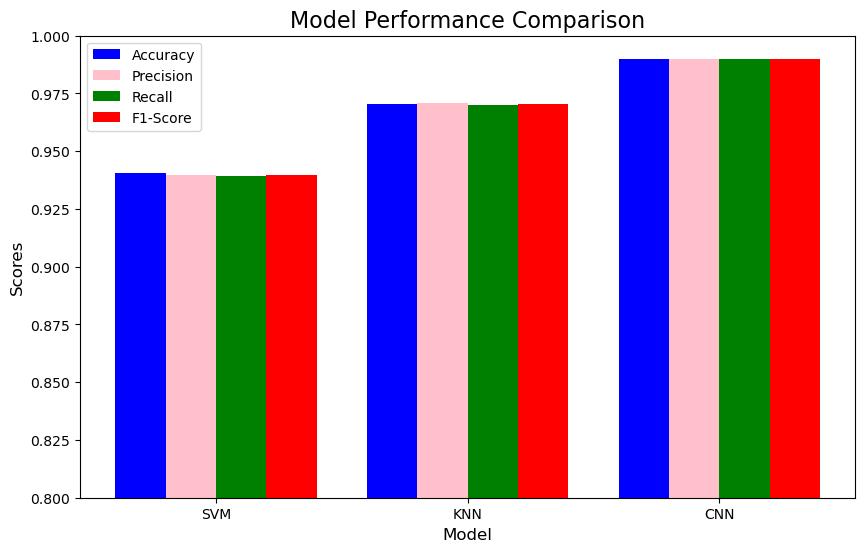

In [79]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))

bar_width = 0.2
positions = np.arange(len(summary_df['Model']))

plt.bar(positions, summary_df['Accuracy'], width=bar_width, label='Accuracy', color='blue') 
plt.bar(positions + bar_width, summary_df['Precision'], width=bar_width, label='Precision', color='pink') 
plt.bar(positions + 2*bar_width, summary_df['Recall'], width=bar_width, label='Recall', color='green')  
plt.bar(positions + 3*bar_width, summary_df['F1-Score'], width=bar_width, label='F1-Score', color='red')  # Light Red

plt.xlabel('Model', fontsize=12)
plt.ylabel('Scores', fontsize=12)
plt.title('Model Performance Comparison', fontsize=16)
plt.xticks(positions + bar_width*1.5, summary_df['Model'])
plt.legend()

plt.ylim(0.8, 1.0)

plt.show()


The simple bar plot compares the performance of three models in terms of accuracy, precision, recall, and F1-score. As we can see CNN demonstrates the highest performance across all metrics.

# Live digit prediction by creating a GUI

Lets finally implement our model. Here we create a simple graphical user interface (GUI) for live digit prediction using our trained model. The application allows users to upload an image of a handwritten digit, preprocesses the image, and predicts the digit

In [103]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk, ImageOps
import numpy as np
import tensorflow as tf

# Load the trained CNN model
cnn_model = tf.keras.models.load_model('best_model.keras')

def preprocess_image(image_path, invert_colors=False):
    """Preprocess the image for prediction with optional color inversion"""
    img = Image.open(image_path).convert('L')
    
    if invert_colors:
        img = ImageOps.invert(img)
    
    img = img.resize((28, 28))
    img_array = np.array(img) / 255.0
    img_array = img_array.reshape(1, 28, 28, 1)
    
    return img_array

def predict_digit(image_path, invert_colors=False):
    """Predict the digit from the image"""
    img_array = preprocess_image(image_path, invert_colors)
    prediction = cnn_model.predict(img_array)
    predicted_class = np.argmax(prediction)
    return predicted_class

def upload_image():
    """Handle the image upload and prediction"""
    file_path = filedialog.askopenfilename(filetypes=[("Image Files", "*.png;*.jpg;*.jpeg")])
    if file_path:
        try:
            img = Image.open(file_path)
            img.thumbnail((200, 200))
            img_tk = ImageTk.PhotoImage(img)
            
            image_label.config(image=img_tk)
            image_label.image = img_tk
            
            invert = invert_var.get()
            predicted_class = predict_digit(file_path, invert_colors=invert)
            result_label.config(text=f'Predicted Digit: {predicted_class}')
        except Exception as e:
            messagebox.showerror("Error", f"An error occurred: {str(e)}")

def clear_image():
    """Clear the uploaded image and result"""
    image_label.config(image='')
    result_label.config(text="Predicted Digit: ")

# Create the GUI window
root = tk.Tk()
root.title('Digit Recognition')

# Create and place widgets
upload_button = tk.Button(root, text="Upload Image", command=upload_image)
upload_button.pack(pady=10)

clear_button = tk.Button(root, text="Clear", command=clear_image)
clear_button.pack(pady=10)

image_label = tk.Label(root)
image_label.pack(pady=10)

result_label = tk.Label(root, text="Predicted Digit: ")
result_label.pack(pady=10)

# Create the checkbox for color inversion
invert_var = tk.BooleanVar()
invert_checkbox = tk.Checkbutton(root, text="Invert Colors", variable=invert_var)
invert_checkbox.pack(pady=10)

# Run the application
root.mainloop()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
